In [1]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr 
import pandas as pd

/Users/engelse2/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'netCDF4'

In [2]:
#profilesF11_20 = pd.read_csv('FullEntrainmentCode11-20.txt', delimiter='\t', names=["z1660", "z1720", "z1780", "z1840", "z1900", "z1960", "z11020", "z11080", "z11140", "z1120", "z1eslabavg1", "z1eslabavg2", "z1eslabavg3", "z1eslabavg4", "z1eslabavg5", "z1eslabavg6", "z1eslabavg7", "z1eslabavg8", "z1eslabavg9", "z1eslabavg10"])
#profilesF21_30 = pd.read_csv('FullEntrainmentCode21-30.txt', delimiter='\t', names=["z21260", "z21320", "z21380", "z21440", "z21500", "z21560", "z21620", "z21680", "z21740", "z21800", "z2eslabavg1", "z2eslabavg2", "z2eslabavg3", "z2eslabavg4", "z2eslabavg5", "z2eslabavg6", "z2eslabavg7", "z2eslabavg8", "z2eslabavg9", "z2eslabavg10"])

profilesQ11_20 = pd.read_csv('QuartEntrainmentCode11-20.txt', delimiter='\t')
profilesQ21_30 = pd.read_csv('QuartEntrainmentCode21-30.txt', delimiter='\t')

profilesH11_20 = pd.read_csv('HalfEntrainmentCode11-20.txt', delimiter='\t')
profilesH21_30 = pd.read_csv('HalfEntrainmentCode21-30.txt', delimiter='\t')

profilesF11_20 = pd.read_csv('FullEntrainmentCode11-20.txt', delimiter='\t')
profilesF21_30 = pd.read_csv('FullEntrainmentCode21-30.txt', delimiter='\t')

profilesCf81_90 = pd.read_csv('CarpfEntrainmentCode81-90.txt', delimiter='\t')
profilesCf91_100 = pd.read_csv('CarpfEntrainmentCode91-100.txt', delimiter='\t')

profilesCf61_70 = pd.read_csv('Carpf100EntrainmentCode61-70.txt', delimiter='\t')
profilesCf71_80 = pd.read_csv('Carpf100EntrainmentCode71-80.txt', delimiter='\t')

profilesCf59_60 = pd.read_csv('CarpF100EntrainmentCode59_60.txt', delimiter ='\t')


In [10]:
newcarp3540 = profilesCf59_60['z11eslabavg1']
newcarp3600 = profilesCf59_60['z11eslabavg2']

In [3]:
#Quarter
z = profilesQ11_20['z1660']
quart660 = profilesQ11_20['z1eslabavg1']
quart720 = profilesQ11_20['z1eslabavg2']
quart780 = profilesQ11_20['z1eslabavg3']
quart840 = profilesQ11_20['z1eslabavg4']
quart900 = profilesQ11_20['z1eslabavg5']
quart960 = profilesQ11_20['z1eslabavg6']
quart1020 = profilesQ11_20['z1eslabavg7']
quart1080 = profilesQ11_20['z1eslabavg8']
quart1140 = profilesQ11_20['z1eslabavg9']
quart1200 = profilesQ11_20['z1eslabavg10']

quart1260 = profilesQ21_30['z2eslabavg1']
quart1320 = profilesQ21_30['z2eslabavg2']
quart1380 = profilesQ21_30['z2eslabavg3']
quart1440 = profilesQ21_30['z2eslabavg4']
quart1500 = profilesQ21_30['z2eslabavg5']
quart1560 = profilesQ21_30['z2eslabavg6']
quart1620 = profilesQ21_30['z2eslabavg7']
quart1680 = profilesQ21_30['z2eslabavg8']
quart1740 = profilesQ21_30['z2eslabavg9']
quart1800 = profilesQ21_30['z2eslabavg10']

In [6]:
#Half
z = profilesQ11_20['z1660']
half660 = profilesH11_20['z3eslabavg1']
half720 = profilesH11_20['z3eslabavg2']
half780 = profilesH11_20['z3eslabavg3']
half840 = profilesH11_20['z3eslabavg4']
half900 = profilesH11_20['z3eslabavg5']
half960 = profilesH11_20['z3eslabavg6']
half1020 = profilesH11_20['z3eslabavg7']
half1080 = profilesH11_20['z3eslabavg8']
half1140 = profilesH11_20['z3eslabavg9']
half1200 = profilesH11_20['z3eslabavg10']

half1260 = profilesH21_30['z4eslabavg1']
half1320 = profilesH21_30['z4eslabavg2']
half1380 = profilesH21_30['z4eslabavg3']
half1440 = profilesH21_30['z4eslabavg4']
half1500 = profilesH21_30['z4eslabavg5']
half1560 = profilesH21_30['z4eslabavg6']
half1620 = profilesH21_30['z4eslabavg7']
half1680 = profilesH21_30['z4eslabavg8']
half1740 = profilesH21_30['z4eslabavg9']
half1800 = profilesH21_30['z4eslabavg10']

In [8]:
#Full
z = profilesQ11_20['z1660']
full660 = profilesF11_20['z5eslabavg1']
full720 = profilesF11_20['z5eslabavg2']
full780 = profilesF11_20['z5eslabavg3']
full840 = profilesF11_20['z5eslabavg4']
full900 = profilesF11_20['z5eslabavg5']
full960 = profilesF11_20['z5eslabavg6']
full1020 = profilesF11_20['z5eslabavg7']
full1080 = profilesF11_20['z5eslabavg8']
full1140 = profilesF11_20['z5eslabavg9']
full1200 = profilesF11_20['z5eslabavg10']

full1260 = profilesF21_30['z6eslabavg1']
full1320 = profilesF21_30['z6eslabavg2']
full1380 = profilesF21_30['z6eslabavg3']
full1440 = profilesF21_30['z6eslabavg4']
full1500 = profilesF21_30['z6eslabavg5']
full1560 = profilesF21_30['z6eslabavg6']
full1620 = profilesF21_30['z6eslabavg7']
full1680 = profilesF21_30['z6eslabavg8']
full1740 = profilesF21_30['z6eslabavg9']
#full1800 = profilesF21_30['z6eslabavg10']
#print(len(full1260))
#print(len(full1200))
#print(len(full1140))
#print(len(quart1260))
#print(len(carpf5400))

In [6]:
#Carp_full_250
z250 = profilesCf81_90['4860']
carpf4860 = profilesCf81_90['z7eslabavg1']
carpf4920 = profilesCf81_90['z7eslabavg2']
carpf4980 = profilesCf81_90['z7eslabavg3']
carpf5040 = profilesCf81_90['z7eslabavg4']
carpf5100 = profilesCf81_90['z7eslabavg5']
carpf5160 = profilesCf81_90['z7eslabavg6']
carpf5220 = profilesCf81_90['z7eslabavg7']
carpf5280 = profilesCf81_90['z7eslabavg8']
carpf5340 = profilesCf81_90['z7eslabavg9']
carpf5400 = profilesCf81_90['z7eslabavg10']

carpf5460 = profilesCf91_100['z8eslabavg1']
carpf5520 = profilesCf91_100['z8eslabavg2']
carpf5580 = profilesCf91_100['z8eslabavg3']
carpf5640 = profilesCf91_100['z8eslabavg4']
carpf5700 = profilesCf91_100['z8eslabavg5']
carpf5760 = profilesCf91_100['z8eslabavg6']
carpf5820 = profilesCf91_100['z8eslabavg7']
carpf5880 = profilesCf91_100['z8eslabavg8']
carpf5940 = profilesCf91_100['z8eslabavg9']
carpf6000 = profilesCf91_100['z8eslabavg10']

In [4]:
#Carp_full_100  ##CHANGE TIMES
#z250 = profilesCf81_90['4860']
carpf3660 = profilesCf61_70['z9eslabavg1']
carpf3720 = profilesCf61_70['z9eslabavg2']
carpf3780 = profilesCf61_70['z9eslabavg3']
carpf3840 = profilesCf61_70['z9eslabavg4']
carpf3900 = profilesCf61_70['z9eslabavg5']
carpf3960 = profilesCf61_70['z9eslabavg6']
carpf4020 = profilesCf61_70['z9eslabavg7']
carpf4080 = profilesCf61_70['z9eslabavg8']
carpf4140 = profilesCf61_70['z9eslabavg9']
carpf4200 = profilesCf61_70['z9eslabavg10']

carpf4260 = profilesCf71_80['z10eslabavg1']
carpf4320 = profilesCf71_80['z10eslabavg2']
carpf4380 = profilesCf71_80['z10eslabavg3']
carpf4440 = profilesCf71_80['z10eslabavg4']
carpf4500 = profilesCf71_80['z10eslabavg5']
carpf4560 = profilesCf71_80['z10eslabavg6']
carpf4620 = profilesCf71_80['z10eslabavg7']
carpf4680 = profilesCf71_80['z10eslabavg8']
carpf4740 = profilesCf71_80['z10eslabavg9']
carpf4800 = profilesCf71_80['z10eslabavg10']

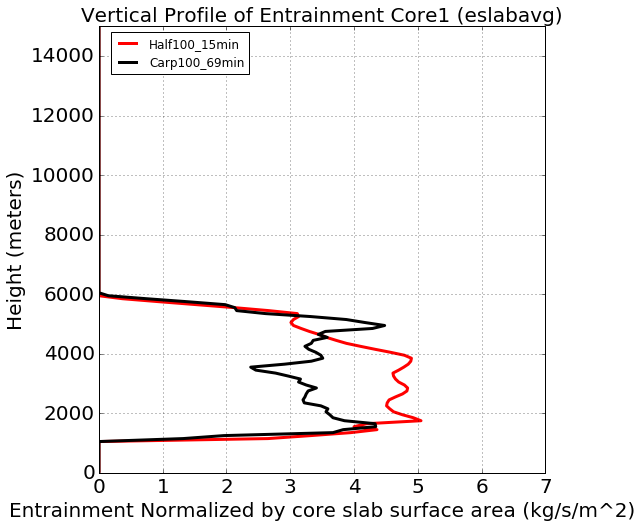

In [14]:
#Core1
plt.figure(figsize=(8, 8))
plt.yticks(np.arange(0, 20000, 2000))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Height (meters)', fontsize=20)
plt.xlabel('Entrainment Normalized by core slab surface area (kg/s/m^2)', fontsize=20)
#plotting
#plt.plot(quart840,z,color="blue",linewidth=3.0,label="Quart100")
plt.plot(half900,z,color="red",linewidth=3.0,label="Half100_15min")
# plt.plot(full900,z,color="green",linewidth=3.0,label="Full100")
#plt.plot(carpf5100,z250,color="orange",linewidth=3.0,label="Carpf250")
#plt.plot(newcarp3600,z,color="black",linewidth=3.0,label="Carp100_60min")
plt.plot(carpf4140,z,color="black",linewidth=3.0,label="Carp100_69min")
plt.xlim(0,7)
plt.ylim(0,15000)
plt.title('Vertical Profile of Entrainment Core1 (eslabavg)', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')


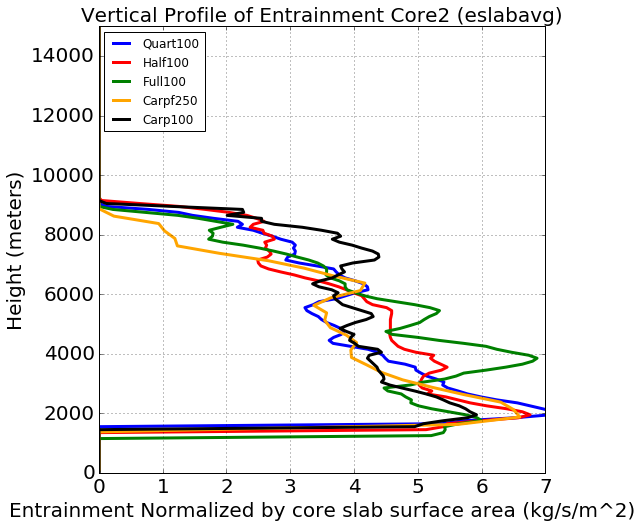

In [9]:
#Core2
plt.figure(figsize=(8, 8))
plt.yticks(np.arange(0, 20000, 2000))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Height (meters)', fontsize=20)
plt.xlabel('Entrainment Normalized by core slab surface area (kg/s/m^2)', fontsize=20)
#plotting
plt.plot(quart1440,z,color="blue",linewidth=3.0,label="Quart100")
plt.plot(half1320,z,color="red",linewidth=3.0,label="Half100")
plt.plot(full1440,z,color="green",linewidth=3.0,label="Full100")
plt.plot(carpf5820,z250,color="orange",linewidth=3.0,label="Carpf250")
plt.plot(carpf4800,z,color="black",linewidth=3.0,label="Carp100")
plt.xlim(0,7)
plt.ylim(0,15000)
plt.title('Vertical Profile of Entrainment Core2 (eslabavg)', fontsize=20)
plt.legend(bbox_to_anchor=(.25, 1.0), loc=1)
grid('on')


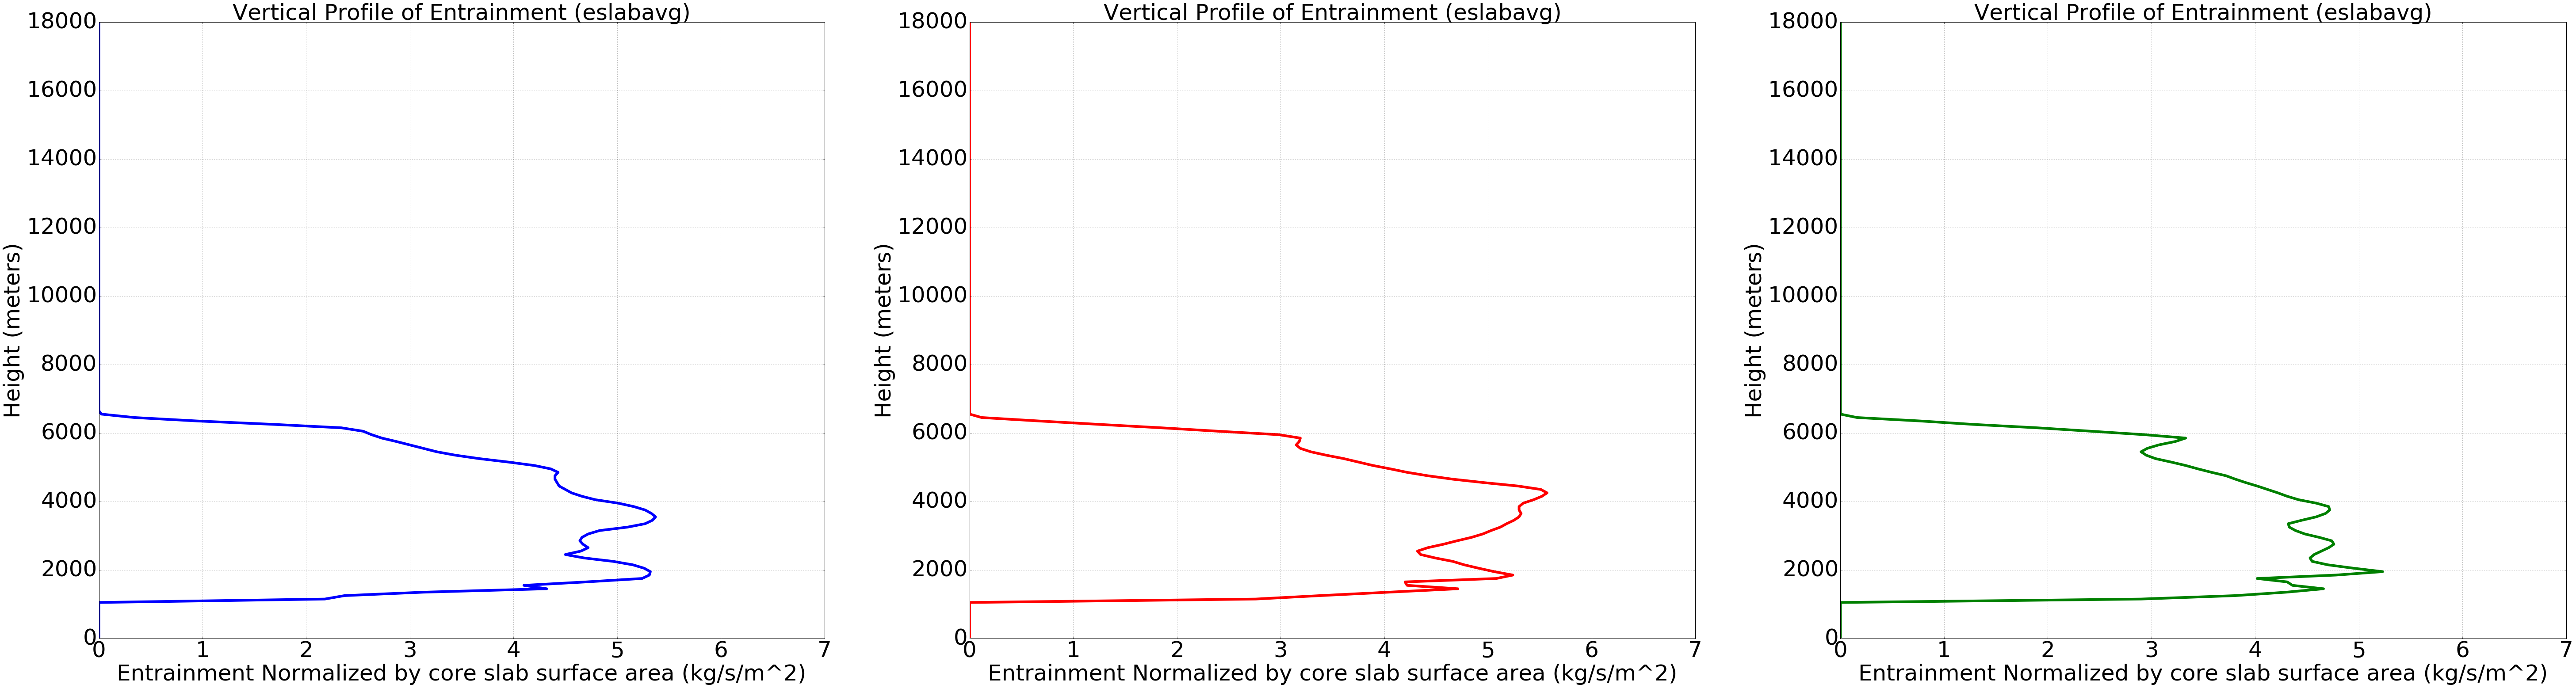

In [10]:
#plt.subplot(rows,columns,plot_number)

plt.figure(figsize=(100, 25))
plt.subplot(1,3,1)
plt.yticks(np.arange(0, 20000, 2000))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('Height (meters)', fontsize=50)
plt.xlabel('Entrainment Normalized by core slab surface area (kg/s/m^2)', fontsize=50)
plt.plot(quart960,z,color="blue",linewidth=6.0)
plt.xlim(0,7)
plt.ylim(0,18000)
plt.title('Vertical Profile of Entrainment (eslabavg)', fontsize=50)
grid('on')

plt.subplot(1,3,2)
plt.yticks(np.arange(0, 20000, 2000))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('Height (meters)', fontsize=50)
plt.xlabel('Entrainment Normalized by core slab surface area (kg/s/m^2)', fontsize=50)
plt.plot(half960,z,color="red",linewidth=6.0)
plt.xlim(0,7)
plt.ylim(0,18000)
plt.title('Vertical Profile of Entrainment (eslabavg)', fontsize=50)
grid('on')

plt.subplot(1,3,3)
plt.yticks(np.arange(0, 20000, 2000))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('Height (meters)', fontsize=50)
plt.xlabel('Entrainment Normalized by core slab surface area (kg/s/m^2)', fontsize=50)
plt.plot(full1200,z,color="green",linewidth=6.0)
plt.xlim(0,7)
plt.ylim(0,18000)
plt.title('Vertical Profile of Entrainment (eslabavg)', fontsize=50)
grid('on')



plt.show()